In [1]:
# CHURN means loosing the coustomers for any product , telecom ,.....
# NO-CHURN means How to reduce the loosing of coustomers for any product , telecom.....

In [6]:
!pip install pymysql

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [74]:
column_header=["State","Account Length","Area Code","Phone","International Plan","VMail Plan","VMail Message","Day Mins","Day Calls","Day Charge","Eve Mins","Eve Calls","Eve Charge","Night Mins","Night Calls","Night Charge","International Mins","International calls","International Charge","CustServ Calls","Churn"]

In [75]:
data = pd.read_csv('C:/Users/user123/Downloads/telecom_churn_data.csv', delimiter=",",header=None,names=column_header,index_col=False)
data.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                   4617 non-null object
Account Length          4617 non-null int64
Area Code               4617 non-null int64
Phone                   4617 non-null object
International Plan      4617 non-null object
VMail Plan              4617 non-null object
VMail Message           4617 non-null int64
Day Mins                4617 non-null float64
Day Calls               4617 non-null int64
Day Charge              4617 non-null float64
Eve Mins                4617 non-null float64
Eve Calls               4617 non-null int64
Eve Charge              4617 non-null float64
Night Mins              4617 non-null float64
Night Calls             4617 non-null int64
Night Charge            4617 non-null float64
International Mins      4617 non-null float64
International calls     4617 non-null int64
International Charge    4617 non-null float64
CustServ Calls          4617 non-null

In [77]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [78]:
data.shape

(4617, 21)

In [79]:
data.isnull().sum()

State                   0
Account Length          0
Area Code               0
Phone                   0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

In [80]:
# here we are seeing how mnay has T or F
from collections import Counter
Counter(data.Churn)

Counter({' False.': 3961, ' True.': 656})

In [81]:
%matplotlib inline

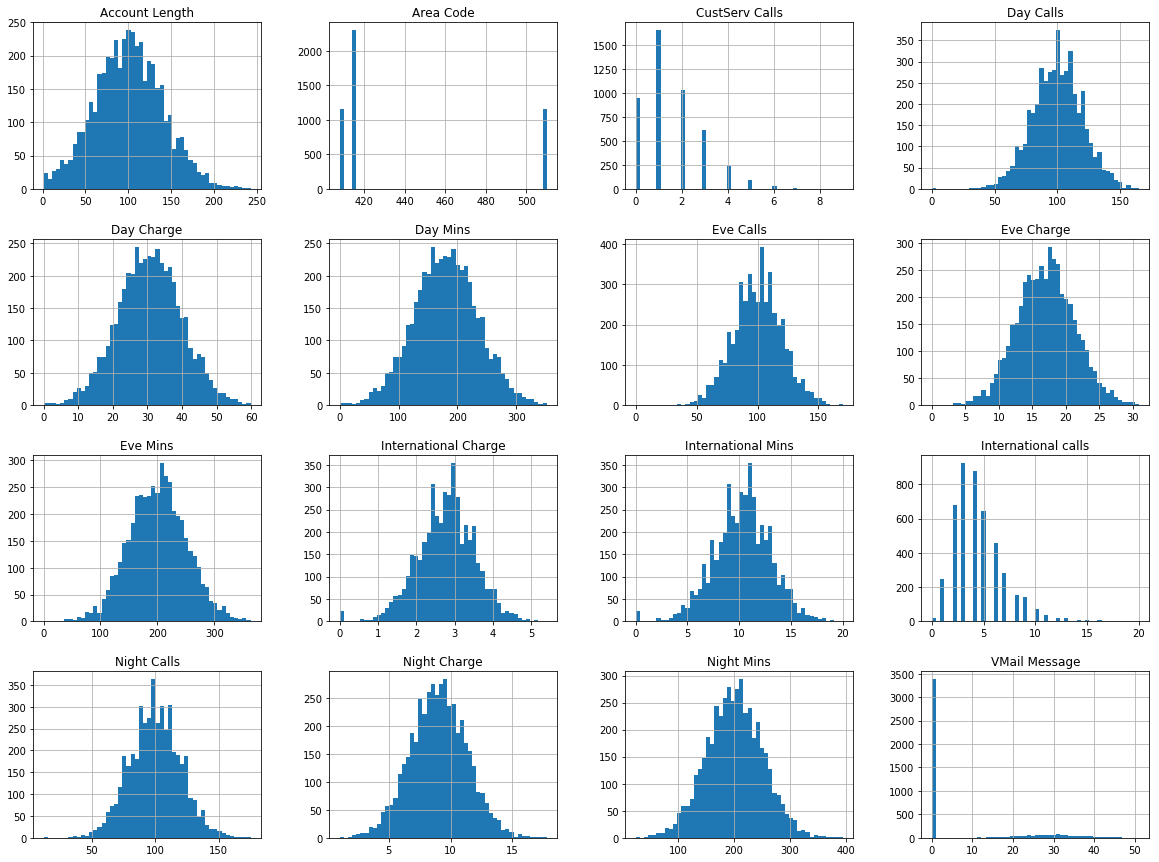

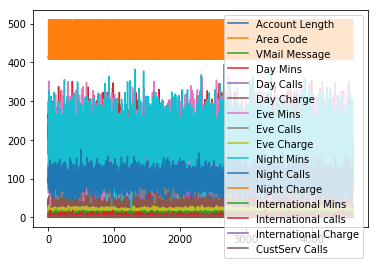

In [82]:
# by this visualization we cansee the which have Normal distribution (or) Gaussian distribution , whic doesn't have Normal distribution
# we can see this type distribution by using skewness & kurtosis
data.hist(bins=50, figsize=(20,15))
data.plot()

In [83]:
# from above we observed the Vmail message , internationalcalls , cus srv calls , doen't have the normal distribution
# we covert them in to normal distribution by using log 0r sqrt


In [84]:
data.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


<function matplotlib.pyplot.show(*args, **kw)>

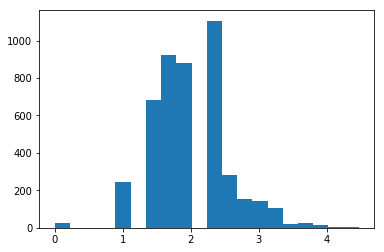

In [85]:
# by using sqrt we canconvert the International calls into Normal distribution
plt.hist(np.sqrt(data['International calls']),bins=20)
plt.show

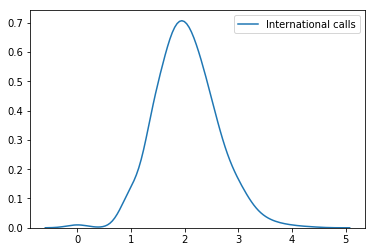

In [86]:
sns.kdeplot(np.sqrt(data['International calls']), bw=0.2)


<function matplotlib.pyplot.show(*args, **kw)>

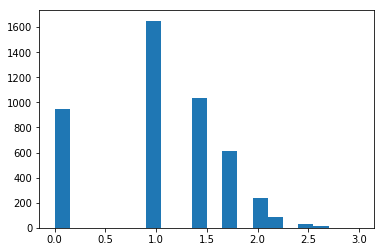

In [87]:
plt.hist(np.sqrt(data['CustServ Calls']),bins=20)
plt.show

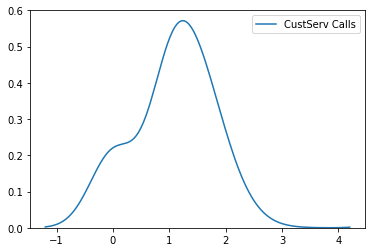

In [88]:
sns.kdeplot(np.sqrt(data['CustServ Calls']), bw=0.4) # here bw means band width , when we increase it will change the distributon


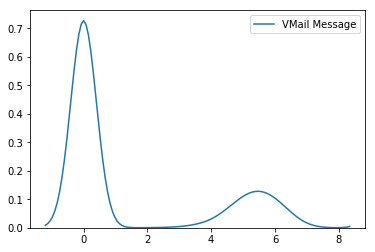

In [89]:
(sns.kdeplot(np.sqrt(data['VMail Message']), bw=0.4))

# Large number of people do not have Voice mail(which is Median). Dropping is not recommended


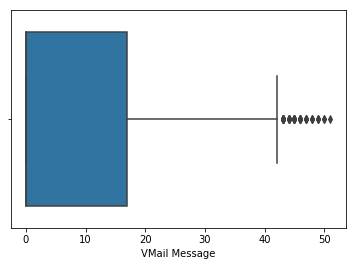

In [90]:
sns.boxplot(data['VMail Message']) #Outliers: People who have Vmail


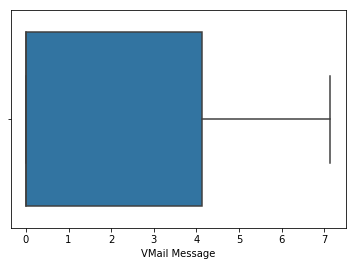

In [91]:
# we hve removed the outliers by using the sqrt
sns.boxplot(np.sqrt(data['VMail Message']))


In [92]:
data_1=data.drop(["Area Code","Phone"],axis=1)

In [93]:
data_1['International calls'] = np.sqrt(data_1['International calls'])
data_1['CustServ Calls'] = np.sqrt(data_1['CustServ Calls'])
data_1['VMail Message'] = np.sqrt(data_1['VMail Message'])

In [94]:
data_1=pd.get_dummies(data_1, columns=['State'])
del data_1['State_WY'] #n-1 dummies




In [95]:
X = data_1.drop(['Churn'],axis=1).values
y = data_1['Churn'].values

In [96]:
data_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 68 columns):
Account Length          4617 non-null int64
International Plan      4617 non-null object
VMail Plan              4617 non-null object
VMail Message           4617 non-null float64
Day Mins                4617 non-null float64
Day Calls               4617 non-null int64
Day Charge              4617 non-null float64
Eve Mins                4617 non-null float64
Eve Calls               4617 non-null int64
Eve Charge              4617 non-null float64
Night Mins              4617 non-null float64
Night Calls             4617 non-null int64
Night Charge            4617 non-null float64
International Mins      4617 non-null float64
International calls     4617 non-null float64
International Charge    4617 non-null float64
CustServ Calls          4617 non-null float64
Churn                   4617 non-null object
State_AK                4617 non-null uint8
State_AL                4617 non

In [97]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

In [98]:
labelencoder_y = LabelEncoder()

In [99]:
y=labelencoder_y.fit_transform(y)


In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

In [146]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

In [147]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
classifier=RandomForestClassifier(random_state=30,n_estimators=25)

#parameters=[{'min_samples_split':[2,3,4],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]
#grid_search_rf=GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy',cv=10)
#grid_search_rf.fit(X_train,y_train)

#best_parameters=grid_search_rf.best_params_
#probs=grid_search_rf.predict_proba(X_test)

In [148]:
def accuracy_precision(cm):
    tp, fn, fp, tn = cm.ravel()
    accuracy=(tp+tn)/cm.sum()
    specificity=tn/(tn+fp)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    print("Accuracy: %s" %accuracy)
    print("Specificity: %s" %specificity)
    print("Precision: %s" %precision)
    print("Recall: %s" %recall)


In [150]:
#best_parameters

## Training set Accuracy

In [151]:
#import pandas as pd
#y_train_predict=grid_search_rf.predict(X_train)
#cm_train=confusion_matrix(y_train,y_train_predict)
#accuracy_precision(cm_train)

## Testing set Accuracy

In [152]:
#y_test_predict=grid_search_rf.predict(X_test)
#cm_test=confusion_matrix(y_test,y_test_predict)
#accuracy_precision(cm_test)

In [153]:
#confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_predict), 
#    columns=["Predicted False", "Predicted True"], 
#    index=["Actual False", "Actual True"])
#confusion_matrix

In [155]:
model = RandomForestClassifier(random_state=50,n_estimators=20)


In [156]:
X_train.shape

(3462, 67)

In [157]:
y_test.shape

(1155,)

In [158]:
print(model.fit(X_train,y_train))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=50, verbose=0, warm_start=False)


In [159]:
y_predict = model.predict(X_test)
print(y_predict)

[0 0 0 ... 0 0 0]


In [160]:
print(pd.crosstab(y_test,y_predict))

col_0    0   1
row_0         
0      993   7
1       56  99


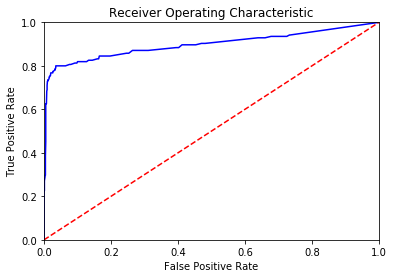

In [161]:
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [162]:
roc_auc_score(y_test,y_test_predict)


0.8255322580645161